# Estimate PCC coefficients

In this example we are going to estimate the correlation between an output sample Y and the corresponding inputs using the Partial Correlation Coefficients.

In [26]:
from __future__ import print_function
import openturns as ot

In [27]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
formula = ['X3+sin(_pi*X1)+7*sin(X2)*sin(_pi*X2)+' + \
           '1.2*((_pi*X3)*(_pi*X2))*sin(_pi*X1)']
input_names = ['X1', 'X2', 'X3']
model = ot.SymbolicFunction(input_names, formula)
distribution = ot.ComposedDistribution([ot.Uniform(-1.0, 1.0)] * 3, \
                                        ot.IndependentCopula(3))
size = 100
inputDesign = ot.SobolIndicesAlgorithmImplementation.Generate(distribution, size, True)
outputDesign = model(inputDesign)

In [28]:
# Compute first order indices using the Saltelli estimator
indices = ot.CorrelationAnalysis.PCC(inputDesign, outputDesign)
print(indices)

[0.195052,0.0183082,0.171376]


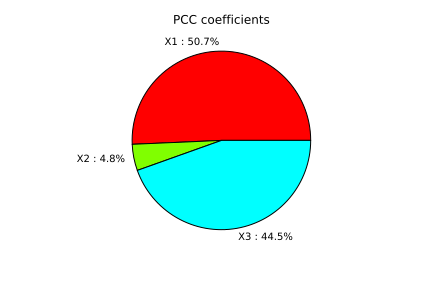

In [29]:
# Draw indices (normalized)
ot.SaltelliSensitivityAlgorithm.DrawImportanceFactors(indices, input_names, 'PCC coefficients')